<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/MS_spherical_collocation_shift_N30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math




N = 30

L0 = 2                                                # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))     # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                      # physical domain (Verificado)             



# Base Matrix (Tchebyshev Polinomials):  (Verificado)

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])




for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi                                     

r0 = 0.5

A0 = 0.01

sigma = 1

Phi_0 = A0*r**2*np.exp(-(r-r0)**2/sigma**2)            # Phi initial (Verificado)
rPhi_0 = 2*A0*r*np.exp(-(r-r0)**2)+A0*r**2*(-2*r+2*r0)*np.exp(-(r-r0)**2)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)
#Phi = np.dot(a0, psi)      # approximative solution in t=0
#rPhi= np.dot(a0, rpsi)
#rrPhi = np.dot(a0, rrpsi)

########################### Plot: Initial Conditions ph Phi

M = 3000

rplot = np.linspace(0.000001,30,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     


psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*rplot**2*np.exp(-(rplot-r0)**2)     
rPhi_plot0 = 2*A0*rplot*np.exp(-(rplot-r0)**2)+A0*rplot**2*(-2*rplot+2*r0)*np.exp(-(rplot-r0)**2)

#dtf_plot0 = (2*(xplot))*np.exp(-(xplot)**2/u**2)/u**2 

Phiplot = np.dot(a0, psiplot)
rPhiplot = np.dot(a0,psiplot)


erro = Phi_plot0 - Phiplot

erro_2 = (Phi_plot0 - Phiplot)**2
#dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)

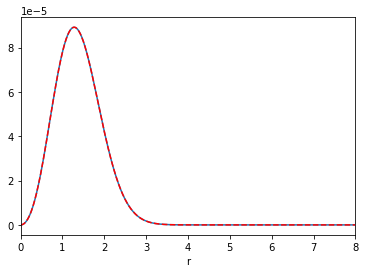

In [ ]:
plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()

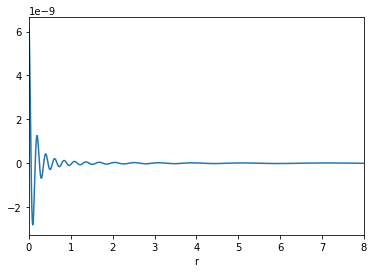

In [ ]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()

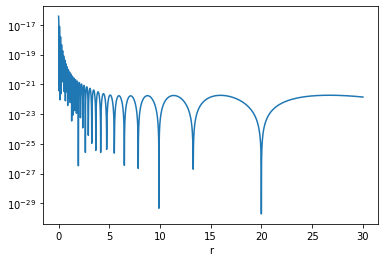

In [ ]:
plt.plot(rplot, erro_2)
plt.xlabel('r')
plt.yscale('log')
plt.show()

In [3]:
# Initial values of PI:

Pi_0 = np.zeros([N+1])

b0 = np.dot(Pi_0, inv_psi)
#Pi = np.dot(b0, psi) 
#rPi= np.dot(b0, rpsi)
#rrPi = np.dot(b0, rrpsi)


# Initial Chi: import from maple csv file (N = 30)

url = 'https://raw.githubusercontent.com/phmouras/Projeto_Pos/main/c0_30.csv'

df = pd.read_csv(url)

c0 = np.array(list(map(float,df))) 
#Chi = np.dot(c0, psi)  #(Verificado)
#rChi = np.dot(c0, rpsi)
#rrChi = np.dot(c0, rrpsi)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

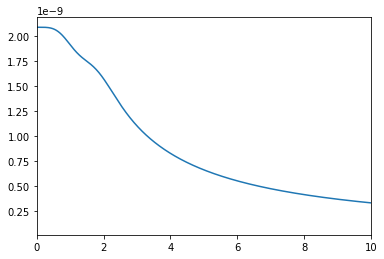

In [ ]:
Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot, Chiplot)
plt.xlim(0,10)
plt.show()

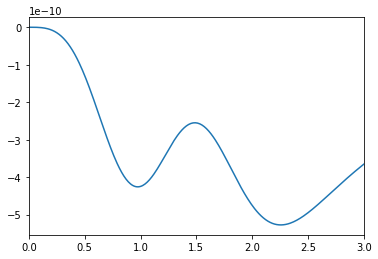

In [ ]:
rChiplot = np.dot(c0, rpsiplot)


plt.plot(rplot, rChiplot)
plt.xlim(0,3)
plt.show()

In [ ]:
# Initial values of Krr:


SB1 = 1/2*(SB[2:(N+3),:] + SB[0:(N+1),:]) #  KrrCK

rSB1 = 1/2*(rSB[2:(N+3),:] + rSB[0:(N+1),:])

rrSB1 = 1/2*(rrSB[2:(N+3),:] + rrSB[0:(N+1),:])


# Equation for Krr: momentum constraint
#res_krr = 2*rChi*Krr + rKrr + 3/r*Krr + Pi*rPhi*np.exp(4*Chi)

#Matrix_Krr = 2*rChi*SB1 + rSB1 + 3*SB1/r 
#inv_matrix_krr = np.linalg.inv(Matrix_Krr)

#ck0 = np.dot(- Pi*rPhi*np.exp(4*Chi), inv_matrix_krr)

#Krr = np.dot(ck0, SB1) 
#rKrr = np.dot(ck0, rSB1)
#rrKrr = np.dot(ck0, rrSB1)

##############

# Initial values of Alpha:

#res_alpha = rrAlpha + 2*(1/r + rChi)*rAlpha - 3/2*Alpha*np.exp(-4*Chi)*Krr**2 - Alpha*np.exp(4*Chi)*(Pi*2-V)

#Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
#inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
#al0 = np.dot(3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V), inv_matrix_alpha)
#Alpha = 1 + np.dot(al0, psi)
#rAlpha = np.dot(al0, rpsi)
#rrAlpha = np.dot(al0, rrpsi)


# Initial values of beta:

# Matrix base para Beta

SB2 = SB[1:(N+2),:]
rSB2 = rSB[1:(N+2),:]
rrSB2 = rrSB[1:(N+2),:]

#Matrix_Beta = rSB2/r - SB2/r**2
#inv_matrix_beta = np.linalg.inv(Matrix_Beta)
#be0 = np.dot((3*Alpha*np.exp(-4*Chi)*Krr)/(2*r) , inv_matrix_beta)
#Beta = np.dot(be0, SB2)
#rBeta = np.dot(be0, rSB2)
#rrBeta = np.dot(be0, rSB2)

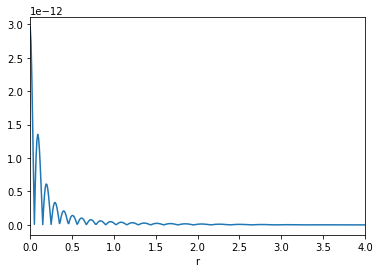

In [ ]:
del_H = 4*rChiplot**2+4*rrChiplot+8*(rChiplot)/rplot+(3/4)*np.exp(-4*Chiplot)*0+np.exp(4*Chiplot)*((1/2)*0+(1/2)*(rPhi_plot0)**2/np.exp(4*Chiplot))

H2 = abs(del_H)


plt.plot(rplot, H2)
plt.xlim(0,4)
plt.xlabel("r")
plt.show()

Field  Equations

In [ ]:
# Equation for Phi:   NAO RODAR

#da = np.dot(Alpha*Pi*np.exp(-6*Chi) + Beta*rPhi, inv_psi)


In [ ]:
# Equation for Pi: KG equation NAO RODAR

#db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)


In [ ]:
# Equation for Chi: NAO RODAR

#dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    


Quadrature Integration

In [ ]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # peso de Legendre (Verificado)




rq = L0*(1+new_col)/(1-new_col) # Verificado



qSB = np.zeros([Nq+3,Nq+1])
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[2:(N+3),:] + qSB[0:(N+1),:])

qrSB1 = 1/2*(qrSB[2:(N+3),:] + qrSB[0:(N+1),:])

qrrSB1 = 1/2*(qrrSB[2:(N+3),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 


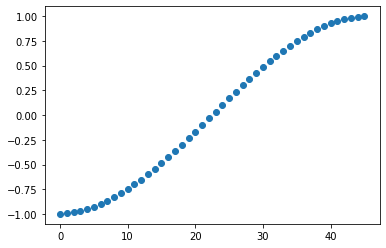

In [ ]:
plt.plot(new_col,'o') 

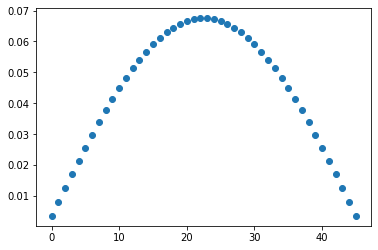

In [ ]:
plt.plot(wq_col,'o')

In [ ]:
#  Hamiltoniann Constraint: Legendre points (Verificado)

#H0 = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)

In [ ]:
# Erro RMS

#erro_H = (1/2*np.dot(H**2,w_col))**1/2

#erro_H

1.8801409167424096e-25

In [ ]:
# Runge Kutta 4th order

h = 0.001   # step size
tf = 5

It = int(tf/h)

t = np.linspace(0, tf, It) 

phi_set = np.zeros([It,M])   
chi_set = np.zeros([It,M])
pi_set = np.zeros([It,M])
L2_H = np.zeros([It])    

V = 0


for i in range(It): 
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  rrPi = np.dot(b0, rrpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3*SB1/r 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  ck0 = np.dot(- Pi*rPhi*np.exp(4*Chi), inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  rrKrr = np.dot(ck0, rrSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  al0 = np.dot(3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V), inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  be0 = np.dot((3*Alpha*np.exp(-4*Chi)*Krr)/(2*r) , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  rrBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi*np.exp(-6*Chi) + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)
  L2_H[i,] = (1/2*np.dot(H**2,wq_col))**1/2
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  rrPi = np.dot(b0 + N1/2, rrpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3*SB1/r 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  ck0 = np.dot(- Pi*rPhi*np.exp(4*Chi), inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  rrKrr = np.dot(ck0, rrSB1) 
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  al0 = np.dot(3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V), inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  be0 = np.dot((3*Alpha*np.exp(-4*Chi)*Krr)/(2*r) , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  rrBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi*np.exp(-6*Chi) + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)
  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  rrPi = np.dot(b0 + N2/2, rrpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3*SB1/r 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  ck0 = np.dot(- Pi*rPhi*np.exp(4*Chi), inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  rrKrr = np.dot(ck0, rrSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  al0 = np.dot(3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V), inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  be0 = np.dot((3*Alpha*np.exp(-4*Chi)*Krr)/(2*r) , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  rrBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi*np.exp(-6*Chi) + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 
  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  rrPi = np.dot(b0 + N3, rrpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3*SB1/r 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  ck0 = np.dot(- Pi*rPhi*np.exp(4*Chi), inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  rrKrr = np.dot(ck0, rrSB1) 
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  al0 = np.dot(3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V), inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  be0 = np.dot((3*Alpha*np.exp(-4*Chi)*Krr)/(2*r) , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  rrBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi*np.exp(-6*Chi) + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set[i,:] = np.dot(a0, psiplot)
  pi_set[i,:] = np.dot(b0, psiplot)
  chi_set[i,:] = np.dot(c0, psiplot)
  
  





In [ ]:
L2_H

1.0929682927399085

1.3238000744930393e-09

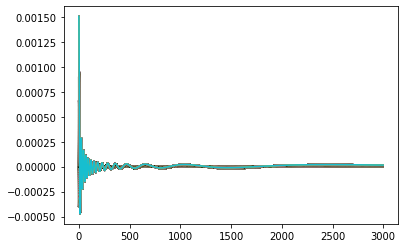

In [ ]:
for i in range(It):
  plt.plot(chi_set[i,:])

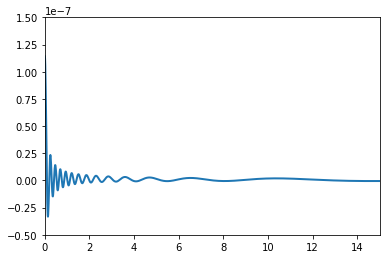

In [ ]:
# Animation plot fo Chi:

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15), ylim = (-0.5e-07, 1.5e-07))
line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):   # i = frame
  y = chi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=10000, interval=2, blit=True)

HTML(anim.to_html5_video())

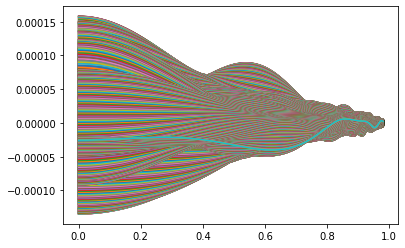

In [ ]:
for i in range(It):
  plt.plot(colplot, phi_set[i,:])

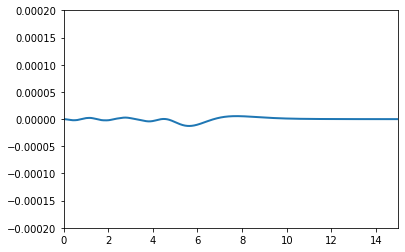

In [ ]:
# Animation plot for Phi: Scalar Field

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15))
line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = phi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=2, blit=True)

HTML(anim.to_html5_video())

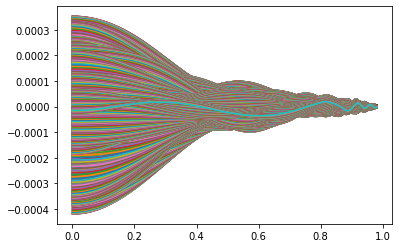

In [ ]:
for i in range(It):
  plt.plot(colplot, pi_set[i,:])

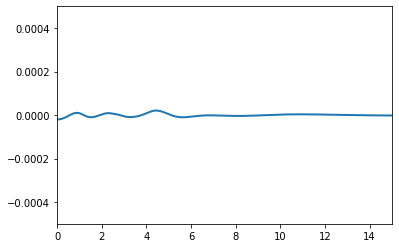

In [ ]:
# Animation plot for Pi:

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15), ylim = (-0.0005, 0.0005))
line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = pi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=4, blit=True)

HTML(anim.to_html5_video())

In [ ]:
t

array([0.00000000e+00, 1.00020004e-03, 2.00040008e-03, ...,
       4.99799960e+00, 4.99899980e+00, 5.00000000e+00])

Text(0.5, 0, 't')

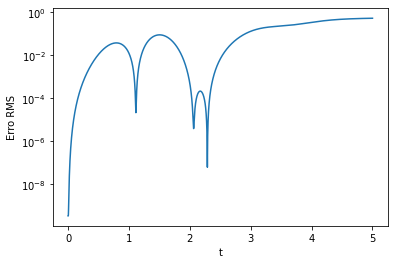

In [ ]:
plt.plot(t,L2_H)
plt.yscale("log")
plt.ylabel("Erro RMS")
plt.xlabel("t")


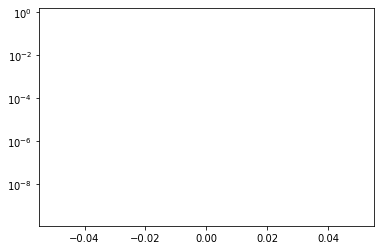

In [ ]:
for i in range(It):
  plt.plot(L2_H[i])
  plt.yscale("log")